In [1]:
import datetime as dt

import pandas as pd

In [4]:
!head -n5 ../files/convocatorias_final.csv

id,codigo_bdns,MRR,administracion,departamento,organo,fecha_registro,titulo_convocatoria,url_bases_regul,titulo_cooficial,colDesconocida1,colDesconocida2,colDesconocida3
819060,"617500","NO","DIPUTACIÓN PROV. DE JAÉN","DIPUTACIÓN PROVINCIAL DE JAÉN",,"25/03/2022","ADQUISICION DE MOBILIARIO PARA EDIFICIO AULAS DE NATURALEZA","https://www.dipujaen.es/portal-de-transparencia/economica-financiera",,,350078,1
819059,"617499","NO","REGIÓN DE MURCIA","INSTITUTO MURCIANO DE ACCION SOCIAL (I.M.A.S.)",,"25/03/2022","MANCOMUNIDAD RIO MULA MANTENIMIENTO CENTRO ATENCIÓN TEMPRANA","https://www.borm.es/services/anuncio/ano/2022/numero/310/pdf?id=799320",,,350078,2
819058,"617498","NO","ONDA","AYUNTAMIENTO DE ONDA",,"25/03/2022","Convenio de colaboración entre el Ayuntamiento de Onda y el Club Deportivo Onda","https://www.onda.es/ond/web_php/index.php?contenido=subapartados_woden&id_boto=355",,,350078,3
819057,"617497","NO","TORRENT","AYUNTAMIENTO DE TORRENT",,"25/03/2022","SUBVENCION DIRECTA VARIOS E

In [14]:
df = pd.read_csv(
    "../files/convocatorias_final.csv",
    index_col="id",
    dtype={
        "codigo_bdns": str,
        "MRR": "category",
        "titulo_cooficial": str,
    },
).sort_values("fecha_registro")
df["fecha_registro"] = pd.to_datetime(df["fecha_registro"], format="%d/%m/%Y")
df = df.drop(columns=[f"colDesconocida{idx}" for idx in range(1, 4)])
df.head()

,codigo_bdns,MRR,administracion,departamento,organo,fecha_registro,titulo_convocatoria,url_bases_regul,titulo_cooficial
id,,,,,,,,,
691727,490167,NO,SANT MATEU DE BAGES,AYUNTAMIENTO DE SANT MATEU DE BAGES,NaN,2020-01-01,APORTACIO GRUP MUNICIPAL CIU,https://bop.diba.cat/scripts/fpisa.aspx?fnew?b...,NaN
744765,543205,NO,PRINCIPADO DE ASTURIAS,CONSEJERÍA DE EDUCACIÓN,NaN,2021-01-01,Subvencion directa a centros concertados para...,Subvencion directa a centros concertados para ...,NaN
805816,604256,NO,HIGUERA LA REAL,AYUNTAMIENTO DE HIGUERA LA REAL,NaN,2022-01-01,AYUDAS ECONÓMICAS POR NACIMIENTO O ADOPCIÓN DE...,https://www.dip-badajoz.es/bop/ventana_anuncio...,NaN
502422,300874,NO,SANTA EULÀRIA DES RIU,AYUNTAMIENTO DE SANTA EULÀRIA DES RIU,NaN,2016-02-01,CONVOCATORIA INSTRUMENTAL-ESCUELA MUNICIPAL DE...,http://www.caib.es/eboibfront/es/2015/10232/55...,NaN
502423,300875,NO,SANTA EULÀRIA DES RIU,AYUNTAMIENTO DE SANTA EULÀRIA DES RIU,NaN,2016-02-01,CONVOCATORIA INSTRUMENTAL-ESCUELA MUNICIPAL DE...,http://www.caib.es/eboibfront/es/2015/10232/55...,NaN


In [15]:
len(df)

350078

In [16]:
df.dtypes

codigo_bdns                    object
MRR                          category
administracion                 object
departamento                   object
organo                         object
fecha_registro         datetime64[ns]
titulo_convocatoria            object
url_bases_regul                object
titulo_cooficial               object
dtype: object

## Enlaces vacíos o incorrectos

En la columna "Link" hay varios valores que en realidad están vacíos:

In [7]:
df.loc[
    ~df["Link"].str.lower().str.contains("^http|www", na=False), "Link"
].value_counts().nlargest(9)

Información no disponible en BDNS2007    45765
No disponible                             1979
NO DISPONIBLE                              641
no tiene                                   401
BR INEXISTENTES                            273
No tiene                                   220
NON TEN                                    194
BR. INEXISTENTES                           186
No procede                                 120
Name: Link, dtype: int64

Recopilamos varios y los reemplazamos por `None`:

In [8]:
links_vacios = [
    "información no disponible en bdns2007",
    "no disponible",
    "no disponible",
    "no tiene",
    "br inexistentes",
    "no tiene",
    "non ten",
    "br. inexistentes",
    "no procede",
    "no publicable",
    "sufragar gastos generales",
    "no aplicable",
    "no disponible",
    ".",
    "no tiene",
    "pendiente de publicación",
    "-",
    "información no disponible",
    "no existe",
    "no hay",
    "no dispone",
    "no",
    "no disponible en bdns",
]

In [9]:
df["Link"] = df["Link"].str.lower().str.strip().replace(links_vacios, None)

Siguen quedando cosas raras:

In [10]:
df.loc[
    ~df["Link"].str.lower().str.contains("^http|www", na=False), "Link"
].str.lower().value_counts().nlargest(20)

aytolalaguna.es                                                                                           138
file:///c:/users/in_belen/downloads/boletin_20190513.pdf                                                   74
sede.teguise.es/public/trans/indicador.aspx?idindicador=132&idindice=gcan                                  46
material inventariable                                                                                     43
dd/mm/aa                                                                                                   41
sede llerena                                                                                               39
español                                                                                                    37
file:///c:/users/ilg154/desktop/ordenanza%20municipal%20reguladora%20concesion%20de%20subvenciones.pdf     35
equipos municipales especializados atención infancia y familia                                             34
eadmin.val

## Análisis exploratorio básico

<AxesSubplot:>

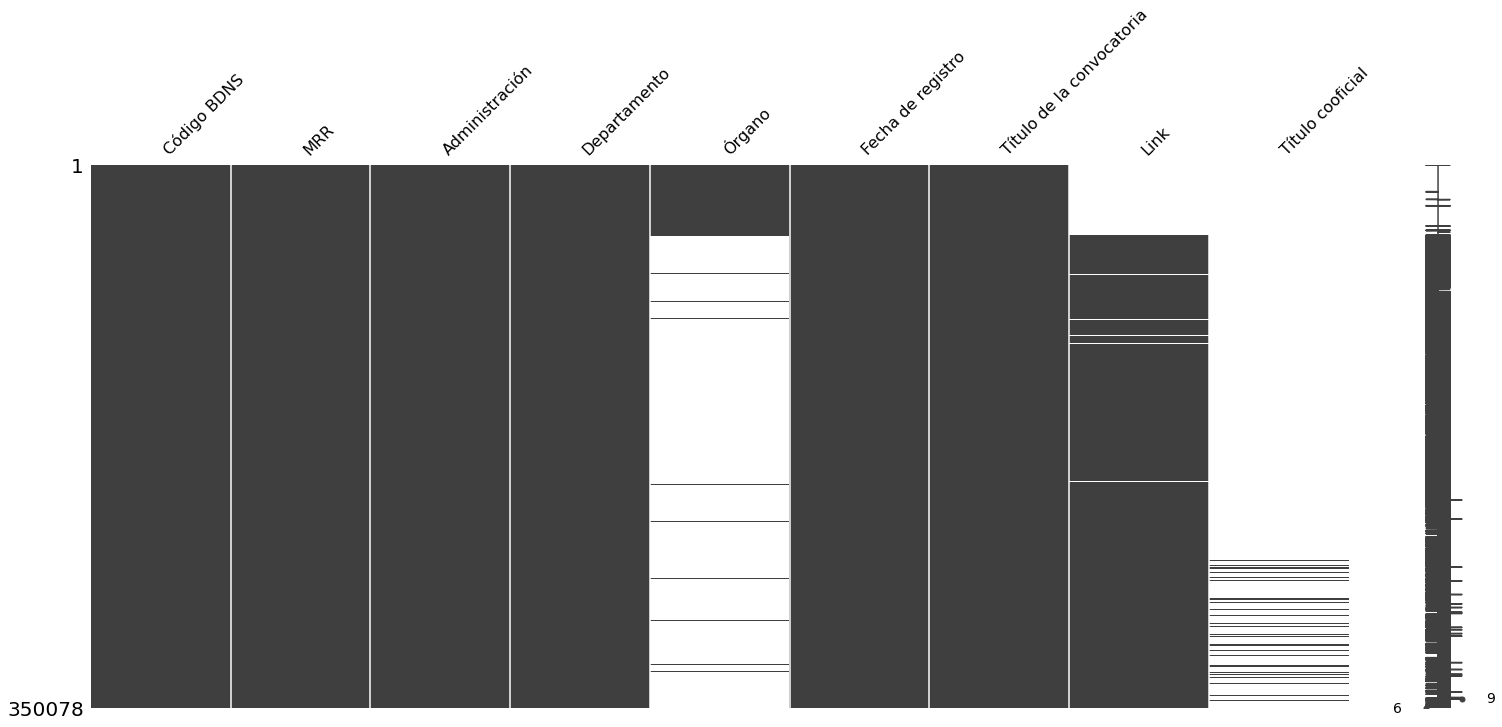

In [11]:
import missingno as msno

msno.matrix(df)

In [12]:
df["MRR"].value_counts()

NO    349584
SI       494
Name: MRR, dtype: int64

In [13]:
df.loc[df["MRR"] == "SI", "Fecha de registro"].describe(datetime_is_numeric=True)

count                              494
mean     2021-11-13 16:42:45.182186240
min                2020-05-02 00:00:00
25%                2021-10-05 12:00:00
50%                2021-12-21 00:00:00
75%                2022-01-14 00:00:00
max                2022-03-24 00:00:00
Name: Fecha de registro, dtype: object

In [14]:
df.loc[~df["Link"].isnull(), ["Fecha de registro", "Link"]].head()

,Fecha de registro,Link
ID,,
76886,2010-10-18,www.juntadeandalucia.es/boja
100745,2011-05-28,http://www.ayto-torrejon.es/intranet/mipaginad...
104951,2011-09-23,https://www.boe.es/boe/dias/2006/04/22/pdfs/a1...
14199,2011-09-29,http://www.boe.es/boe/dias/1993/05/04/pdfs/a13...
102677,2011-10-05,https://www.boe.es/boe/dias/1998/11/21/pdfs/a3...


In [15]:
len(df.loc[~df["Título cooficial"].isnull()]) / len(df)

0.05128285696330532

**Resumen:**

- Parece que el `Órgano` se ponía al principio, pero después casi nunca
- Solo hay dos valores para `MRR`: `SI` y `NO`, pero las convocatorias con `MRR` solo existen de mayo de 2020 en adelante
- Con `Link` pasa al contrario: las convocatorias antes de ~2011 no tienen
- Solo un 5 % de las convocatorias tiene `Título cooficial`